# UN Data Exploration

### 3. Import the required packages with their customary aliases as follows:

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 4/5. Using the pandas `read_csv()` function, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. After reading it in, inspect the first 10 rows and then inspect the last 10 rows.  Drop the 'Value Footnotes' column, and rename the remaining columns to 'Country', 'Year', and 'GDP_Per_Capita'.

In [5]:
gdp_df = (
    pd.read_csv('../data/UNdata_Export_20241016_021042778.csv') 
    .drop(columns = 'Value Footnotes') 
    .rename(columns={'Country or Area': 'Country', 'Value': 'GDP_per_Capita'}) 
)

In [6]:
gdp_df.head(10)

,Country,Year,GDP_per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


In [7]:
gdp_df.head(10)

,Country,Year,GDP_per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
5,Afghanistan,2016,2101.422187
6,Afghanistan,2015,2108.714173
7,Afghanistan,2014,2144.449634
8,Afghanistan,2013,2165.340915
9,Afghanistan,2012,2122.830759


### 6. How many rows and columns does gdp_df have? What are the data types of its columns? If any of the columns are not the expected types, figure out why and fix it.

In [9]:
gdp_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7662 non-null   object 
 1   Year            7662 non-null   int64  
 2   GDP_per_Capita  7662 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 179.7+ KB


We have 7662 rows and 3 columns. 
- Country Column = object,
- Year Column = int
- GDP_per_capita Column = float

### 7. Which years are represented in this dataset? Take a look at the number of observations per year. What do you notice?

In [12]:
gdp_df['Year'].value_counts().sort_index()

Year
1990    207
1991    208
1992    210
1993    211
1994    213
1995    223
1996    223
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    242
2020    242
2021    241
2022    232
Name: count, dtype: int64

The observations occur between the years 1990 and 2013. The ranges from 207 to 232 and is increasing over time and varies.

### 8. How many countries are represented in this dataset? Which countries are least represented in the dataset? Why do you think these countries have so few observations?

In [15]:
gdp_df.loc[:,'Country'].nunique()

242

In [16]:
gdp_df.loc[:, ['Country']].value_counts()

Country                                           
Least developed countries: UN classification          33
Middle East & North Africa                            33
Middle East & North Africa (excluding high income)    33
Middle income                                         33
Mongolia                                              33
                                                      ..
Kosovo                                                15
Sint Maarten (Dutch part)                             14
Turks and Caicos Islands                              12
Somalia                                               10
Djibouti                                              10
Name: count, Length: 242, dtype: int64

There are 242 countries in the dataset. Kosovo, Sint Maarten (Dutch part), Turks and Caicos Islands, Turks Somalia, and Djibouti have the lowest number of observations. The countries are underdeveloped, war-torn (some), and struggle to collect and produce data. It is also possible they started collecting data at a later date. 

### 9. Create a new dataframe by subsetting `gdp_df` to just the year 2021. Call this new dataframe `gdp_20121`.

In [19]:
gdp_2021 = gdp_df.loc[gdp_df['Year'] == 2021]

### 10. Use `.describe()` to find the summary statistics for GDP per capita in 2021. 

In [21]:
gdp_2021.loc[:, ['GDP_per_Capita']].describe()

,GDP_per_Capita
count,241.000000
mean,20711.570080
std,20916.978968
min,714.066712
25%,5044.196028
50%,13754.802423
75%,30974.370692
max,115683.493708


The standard deviation is larger than mean. This denotes a skewed distribution.

### 11. Create a histogram of GDP Per Capita numbers for 2021 (you may wish to adjust the number of bins for your histogram). How would you describe the shape of the distribution?

Text(0.5, 1.0, 'GDP_per_Capita Distribution')

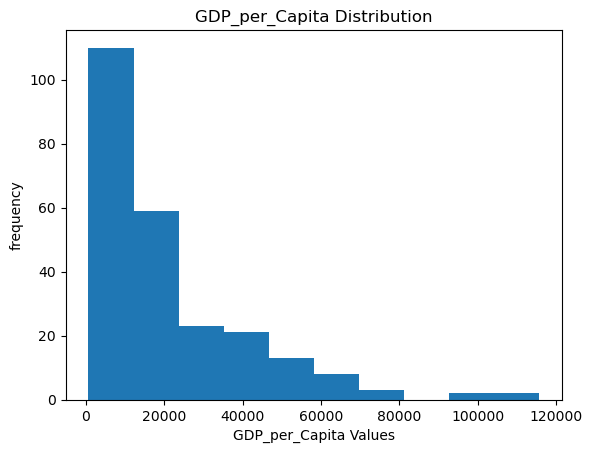

In [24]:
gdp_2021['GDP_per_Capita'].plot(kind='hist')
plt.xlabel('GDP_per_Capita Values')
plt.ylabel('frequency')
plt.title('GDP_per_Capita Distribution')

The distribution is skewed to the right. The outlier data pulls the mean to the right and is greater than the median; thus, the median is a greater representation of the middle and IQR is a greater representation of the spread. I would plot this data with a boxplot.

### 12. Find the top 5 counties and bottom 5 countries by GDP per capita in 2021.

In [27]:
gdp_2021.nlargest(5, columns='GDP_per_Capita')

,Country,Year,GDP_per_Capita
4147,Luxembourg,2021,115683.493708
6107,Singapore,2021,107741.118436
3278,Ireland,2021,102785.490239
5745,Qatar,2021,92862.571798
680,Bermuda,2021,78570.489515


In [28]:
gdp_2021.nsmallest(5, columns='GDP_per_Capita')

,Country,Year,GDP_per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809


**I originally wrote the code below to answer question 12, but I changed it later. In the lecture Michael said
sort_values method was preferred to nlargest and nsmallest -- why?**

In [30]:
gdp_2021.sort_values(by='GDP_per_Capita')

,Country,Year,GDP_per_Capita
972,Burundi,2021,714.066712
1216,Central African Republic,2021,837.504686
1629,Dem. Rep. Congo,2021,1073.643271
6272,Somalia,2021,1136.735989
5073,Niger,2021,1186.576809
...,...,...,...
680,Bermuda,2021,78570.489515
5745,Qatar,2021,92862.571798
3278,Ireland,2021,102785.490239
6107,Singapore,2021,107741.118436


The top 5 countries GDP_per_Capita are Luxembourg, Singapore, Ireland, Qatar, Bermuda, respectively. 
The lowest 5 countries GDP_per_capita are Burundi, Central African Republic, Dem. Rep. Condo, Somalia, Niger. 

### 13. Now, return to the full dataset, `gdp_df`. Pivot the data for 1990 and 2021 (using the pandas `.pivot_table()` method or another method) so that each row corresponds to a country, each column corresponds to a year, and the values in the table give the GDP_Per_Capita amount. Drop any rows that are missing values for either 1990 or 2021. Save the result to a dataframe named `gdp_pivoted`.

In [33]:
gdp_pivoted = (
    gdp_df
    [gdp_df['Year'].isin([1990, 2021])]
    .pivot_table(index = 'Country', columns = 'Year', values = 'GDP_per_Capita')
    .dropna()
)

**I originally used the code below to answer number 13, but I could not get it to drop the NaN values. Can you tell me why?**

In [35]:
# gdp_pivoted = gdp_df.loc[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2021)].pivot_table(index='Country', columns='Year', values='GDP_per_Capita', dropna=True))

## 14. Create a new column in `gdp_pivoted` named `Percent_Change`. This column should contain the percent change in GDP_Per_Capita from 1990 to 2021. Hint: Percent change is calculated as 100*(New Value - Old Value) / Old Value.

In [37]:
gdp_pivoted['Percent_Change'] = ((gdp_pivoted.loc[:, 2021] - gdp_pivoted.loc[:, 1990])/(gdp_pivoted.loc[:, 1990]))*100

## 15. How many countries experienced a negative percent change in GDP per capita from 1990 to 2021?

In [39]:
(gdp_pivoted['Percent_Change'] < 0).sum()

19

19 countries experienced a negative percent change in GDP per capita from 1990 to 2021. 

### 16. Country with highest percent change in GDP_per_Capita

Equatorial Guinea has the highest percentage change GDP per capita. China is the second highest percentage change in GDP per capita.

In [43]:
gdp_pivoted.nlargest(2, 'Percent_Change')

Year,1990,2021,Percent_Change
Country,,,
Equatorial Guinea,936.419751,14637.007350,1463.081870
China,1423.896348,17657.495181,1140.082904


### 16.1  Countries with 1st & 2nd Highest percentage increase Line Plot
Equatorial Guinea had a faster and more volatile rise in GDP per Capita than China. They've recently experienced a down trend. 

Text(0, 0.5, 'GDP_per_Capita')

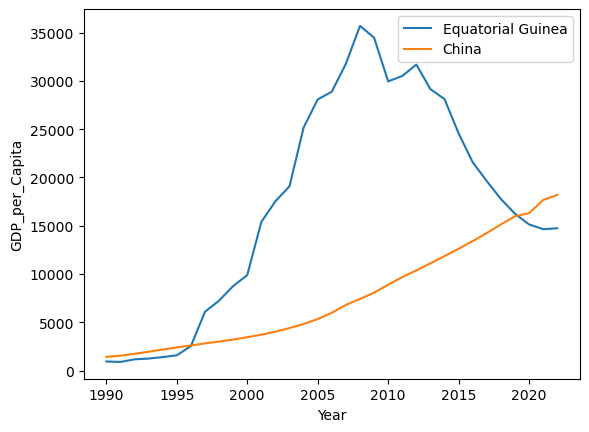

In [45]:
fig, ax = plt.subplots()
gdp_df.loc[gdp_df['Country'] == 'Equatorial Guinea'].plot(kind='line', x='Year', y='GDP_per_Capita', ax=ax, label='Equatorial Guinea')
gdp_df.loc[gdp_df['Country'] == 'China'].plot(kind='line', x='Year', y='GDP_per_Capita', ax=ax, label='China')
plt.ylabel('GDP_per_Capita')

### 17. Read in Continents folder.

In [47]:
continents = pd.read_csv('../data/continents.csv')

### 18. Merge gdp_df and continents. Keep only the countries that appear in both data frames. Save the result back to gdp_df.


In [50]:
gdp_df = pd.merge(
    left = gdp_df, 
    right = continents,
    on = 'Country',
    how = 'inner',
    validate = 'many_to_one'
)

### 19. Determine the number of countries per continent. Create a bar chart showing this.


<Axes: title={'center': 'Numer of countries per Continent'}, xlabel='Continent'>

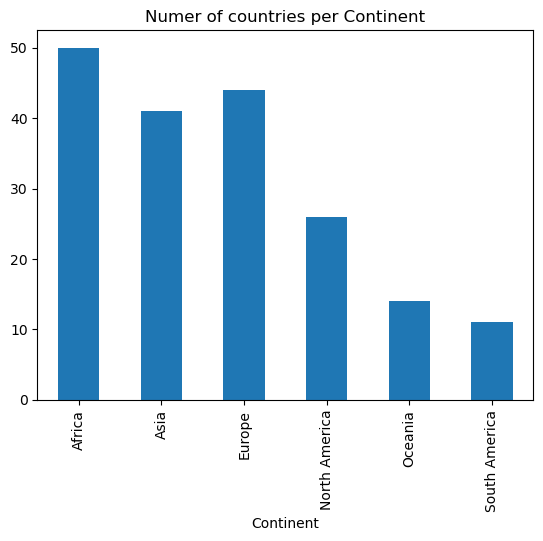

In [143]:
gdp_df.groupby('Continent')['Country'].nunique().plot(kind='bar', title='Numer of countries per Continent')

### 20. Create a seaborn boxplot showing GDP per capita in 2021 split out by continent. What do you notice?

<Axes: xlabel='Continent', ylabel='GDP_per_Capita'>

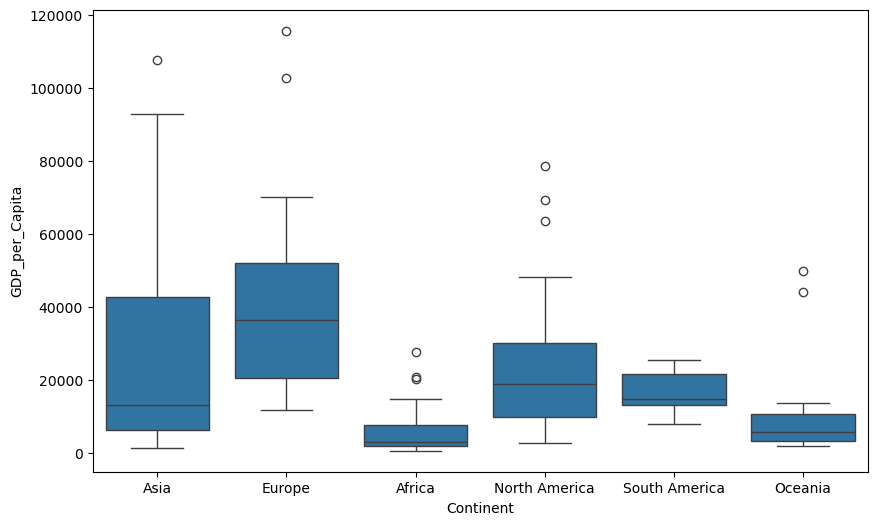

In [153]:
plt.figure(figsize = (10,6))
sns.boxplot(
    x='Continent', 
    y='GDP_per_Capita', 
    data=gdp_df.loc[gdp_df['Year'] == 2021]
)

### 21. Download the full csv containing Life expectancy at birth, total (years) from [https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false](https://data.worldbank.org/indicator/SP.DYN.LE00.IN?name_desc=false). Read this data into a DataFrame named `life_expectancy`. Note: When reading this dataset it, you may encounter an error. Modify your `read_csv` call to correct this **without modifying the original csv file**.

In [166]:
life_expectancy = pd.read_csv('../data/life_exp.csv', header=2)

## 22. Drop the Country Code, Indicator Name, and Indicator Code columns. Then use [`.melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to convert your data from wide to long. That is, instead of having one row per country and multiple colums per year, we want to have multiple rows per country and a single column for year. After melting, rename the columns to `Country`, `Year`, and `Life_Expectancy`.

In [168]:
life_expectancy = (
    life_expectancy
    .drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
    .melt(id_vars='Country Name')
    .rename(columns={'Country Name': 'Country', 'variable':'Year', 'value':'Life_Expectancy'})
)

## 23. What was the first country with a life expectancy to exceed 80?
Japan is the first country.

In [62]:
life_expectancy[life_expectancy['Life_Expectancy'] >= 80].sort_values(by='Year')

,Country,Year,Life_Expectancy
9695,Japan,1996,80.219756
9926,Gibraltar,1997,80.343000
9938,"Hong Kong SAR, China",1997,80.112195
9961,Japan,1997,80.424146
9988,"Macao SAR, China",1997,80.162000
...,...,...,...
16576,Gibraltar,2022,82.830000
16581,Greece,2022,80.636585
16588,"Hong Kong SAR, China",2022,83.660976
16550,Denmark,2022,81.304878


## 24.  Merge `gdp_df` and `life_expectancy`, keeping all countries and years that appear in both DataFrames. Save the result to a new DataFrame named `gdp_le`. If you get any errors in doing this, read them carefully and correct them. Look at the first five rows of your new data frame to confirm it merged correctly. Also, check the last five rows to make sure the data is clean and as expected.

In [64]:
gdp_df.head(1)

,Country,Year,GDP_per_Capita,Continent
0,Afghanistan,2021,1517.016266,Asia


In [65]:
life_expectancy.head(1)

,Country,Year,Life_Expectancy
0,Aruba,1960,64.152


In [66]:
life_expectancy = life_expectancy.dropna()
life_expectancy['Year'] = life_expectancy['Year'].astype(int) # I needed to convert life_expectancy df key from dtype: object to match gdp_df key's dtype: int.
gdp_le = pd.merge(
    gdp_df,
    life_expectancy,
    on = ['Year', 'Country'],
    validate = "one_to_one",
    indicator= True
)
gdp_le.head()

,Country,Year,GDP_per_Capita,Continent,Life_Expectancy,_merge
0,Afghanistan,2021,1517.016266,Asia,61.982,both
1,Afghanistan,2020,1968.341002,Asia,62.575,both
2,Afghanistan,2019,2079.921861,Asia,63.565,both
3,Afghanistan,2018,2060.698973,Asia,63.081,both
4,Afghanistan,2017,2096.093111,Asia,63.016,both


In [67]:
gdp_le.head(1)

,Country,Year,GDP_per_Capita,Continent,Life_Expectancy,_merge
0,Afghanistan,2021,1517.016266,Asia,61.982,both


## 25. Create a new DataFrame, named `gdp_le_2021` by extracting data for the year 2021 from `gdp_le`. How many countries have a life expectancy of at least 80 in 2021?
31 countries have a life expectancy of at least 80. 

In [69]:
gdp_le_2021 = gdp_le.loc[gdp_le['Year'] == 2021]

In [70]:
gdp_le_2021[gdp_le_2021['Life_Expectancy'] >= 80].value_counts().sum()

31

## 26. Find the countries that had the top 3 largest GDP per capita figures for 2021. Create a [seaborn FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) showing the change in life expectancy over time for these three countries. Each individual figure in the facet grid will represent a single country.

In [72]:
gdp_le_2021.sort_values(['GDP_per_Capita'], ascending = False)[0:3] # I needed to find the 3 largest 3 GDP_per_Capita countries for 2021.

,Country,Year,GDP_per_Capita,Continent,Life_Expectancy,_merge
2857,Luxembourg,2021,115683.493708,Europe,82.597561,both
4364,Singapore,2021,107741.118436,Asia,83.092683,both
2285,Ireland,2021,102785.490239,Europe,82.353659,both


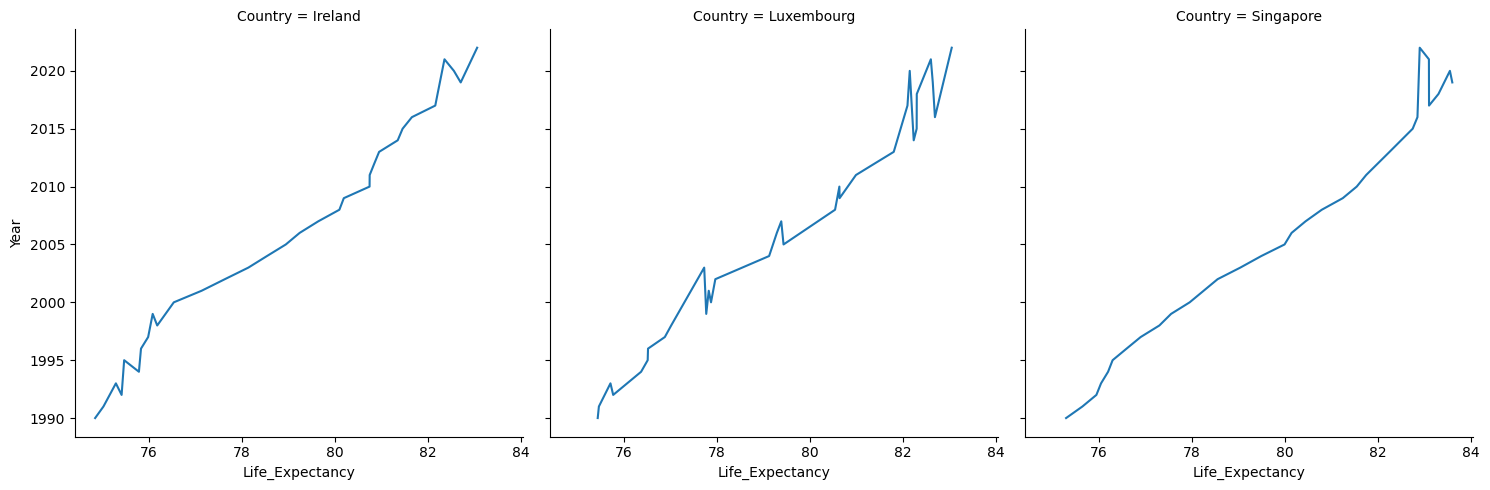

In [73]:
sns.relplot(
    data = gdp_le.loc[(gdp_le['Country'] == 'Luxembourg') | (gdp_le['Country'] == 'Singapore') | (gdp_le['Country'] == 'Ireland')],
    col = 'Country',
    x = 'Life_Expectancy',
    y = 'Year',
    kind = 'line'
)

## 27. Create a scatter plot of Life Expectancy vs GDP per Capita for the year 2021. What do you notice?
There is a positive correlation between the two variables. As GDP per Capita increases life expectancy does too. 

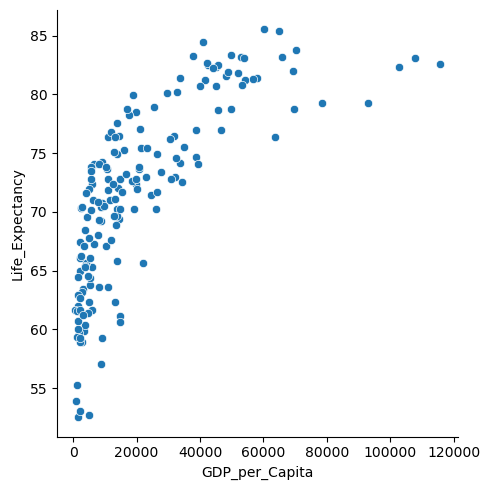

In [75]:
sns.relplot(
    data = gdp_le_2021,
    x = 'GDP_per_Capita',
    y = 'Life_Expectancy',
    kind = 'scatter'
)

## 28. Find the correlation between Life Expectancy and GDP per Capita for the year 2021. What is the meaning of this number?
There is a strong, positive correlation between the two variables. The number ranges between -1 to 1. A positive number represents a direct assocation between the variables (Ex. when one goes up the other goes up and vice versa). A 0 means no correlation between the variables. A negative number represents an indirect association between the variables (Ex. when one goes up the other goes down and vice versa). It is a general rule of thumb that 0 to 0.3 represents a weak association, .3 to .7 represents a medium association, and .7 to 1 represents a strong association. (These numbers aren't exact; it is more or less divided into thirds to describe the strength of the relationship). 

In [77]:
gdp_le_2021[['Life_Expectancy', 'GDP_per_Capita']].corr()

,Life_Expectancy,GDP_per_Capita
Life_Expectancy,1.000000,0.745081
GDP_per_Capita,0.745081,1.000000


## 29. Add a column to `gdp_le_2021` and calculate the logarithm of GDP per capita. Find the correlation between the log of GDP per capita and life expectancy. How does this compare to the calculation in the previous part? Look at a scatter plot to see if the result of this calculation makes sense.
There is a positive and even stronger association between life expectancy and GDP_log. 

In [79]:
pd.options.mode.chained_assignment = None  # default='warn' # I had to shut off the stupid warning system so I could compute np.log on my subset.
gdp_le_2021['GDP_log'] = np.log(gdp_le_2021['GDP_per_Capita'])

In [80]:
gdp_le_2021[['Life_Expectancy', 'GDP_log']].corr()

,Life_Expectancy,GDP_log
Life_Expectancy,1.000000,0.846575
GDP_log,0.846575,1.000000


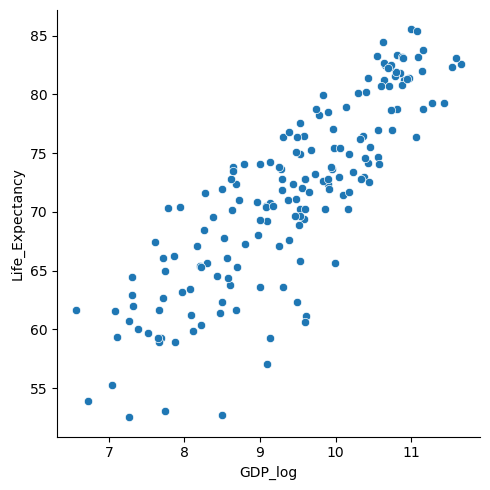

In [81]:
sns.relplot(
    data = gdp_le_2021,
    x = 'GDP_log',
    y = 'Life_Expectancy',
    kind='scatter'
)